# Import necessary libraries

In [24]:
%matplotlib inline
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_datasets as tfds
import pathlib

# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

# Load data and preprocess it

## Option 1:
Download the dataset directly from the provided link. If this does not work, try Option **2**

In [25]:
dataset_url = 'http://vision.roboslang.org/open_datasets/pneumonia_dataset.zip'


## Option 2:
If downloading the dataset from the link is too slow or the link is no longer working, download the dataset from Brigthspace, and upload it to the sample_data folder in Google Colab. For this, open the Files in the left hand side menu, and click the upload button, or drag and drop the archive in the folder you want. Depending on where you have copied this file, you might have to change the path below.



When you upload from the interface sometimes you don't get a lot of feedback for when the upload is done. You can also try to force the upload window to open by executing the below code.

In [3]:
# from google.colab import files
# files.upload()

In [4]:
# For option 2, after you have copied the data locally, point the dataset_url to the local path

dataset_url = '/content/sample_data/datasets/pneumonia_dataset.zip'

##Preprocess the data

In [5]:
out_path = '/content/sample_data/'
archive = tf.keras.utils.get_file(origin=dataset_url, cache_dir='/content/sample_data/', extract=True)

In [6]:
# Create a 'pathlib.Path' object for the downloaded archive
# Pathlib module offers classes representing filesystem paths with semantics
# appropriate for different operating systems.
data_dir = pathlib.Path(archive).with_suffix('')

In [7]:
# Count the number of images in a specific directory
image_count = len(list(data_dir.glob('./train/pneumonia/*.jpeg')))
print(image_count)

100


In [8]:
# BEGIN YOUR CODE HERE

# Pneumonia dataset is split into train and test folders. Inside those folders you will
# find additional folders: pneumonia and normal. You can explore the folders using
# 'Files' tab from the right hand side.
# How many images do we have in training for pneumonia? How many for normal CT scans?
# How about in the testing set? How many for pneumonia and how many for normal scans?
# Tip: use the len() function
# Number of training pneumonia CT scans
training_pneumonia = len(list(data_dir.glob('./train/pneumonia/*.jpeg')))
print(training_pneumonia)
# Number of training normal CT scans
training_pneumonia = len(list(data_dir.glob('./train/normal/*.jpeg')))
print(training_pneumonia)

# Number of testing pneumonia CT scans
testing_pneumonia = len(list(data_dir.glob('./test/pneumonia/*.jpeg')))
print(testing_pneumonia)
# Number of testing normal CT scans
testing_pneumonia = len(list(data_dir.glob('./test/normal/*.jpeg')))
print(testing_pneumonia)

# END YOUR CODE HERE

100
100
50
50


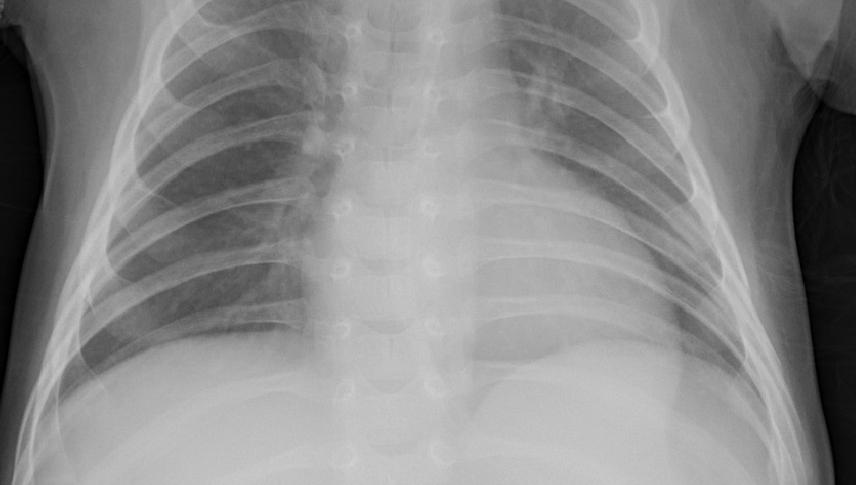

In [9]:
# Create a list of file paths for pneumonia images
pneumonia_images = list(data_dir.glob('train/pneumonia/*'))
# Open and display the first pneumonia image in the list
PIL.Image.open(str(pneumonia_images[0]))

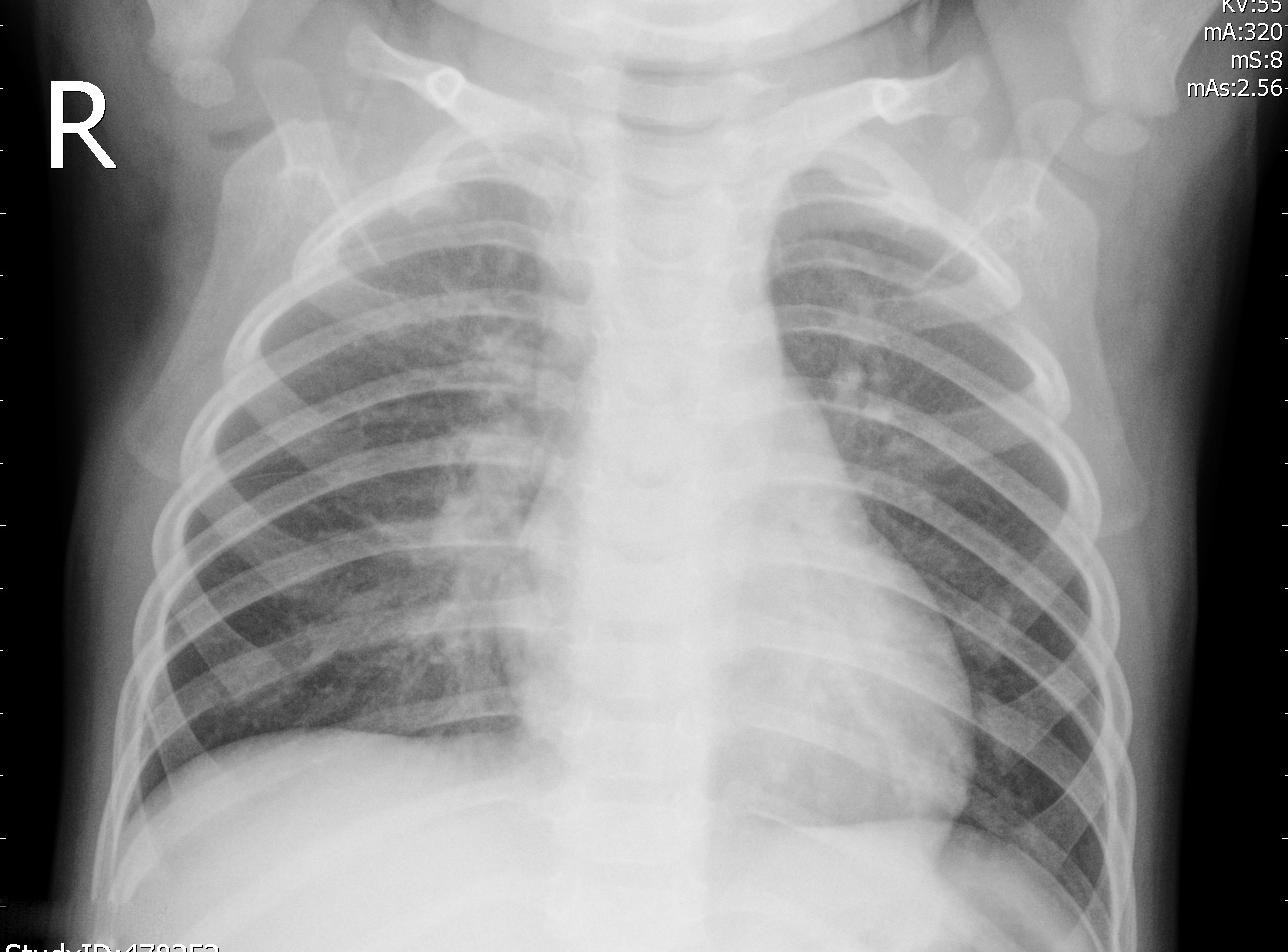

In [10]:
# BEGIN YOUR CODE HERE

# 3. Display a pneumonia and a normal image from the testing dataset

# Create a list of file paths for pneumonia images from the testing dataset
testing_pneumonia_images = list(data_dir.glob('test/pneumonia/*'))
# Open and display the first pneumonia image in the list
PIL.Image.open(str(testing_pneumonia_images[0]))
# END YOUR CODE HERE

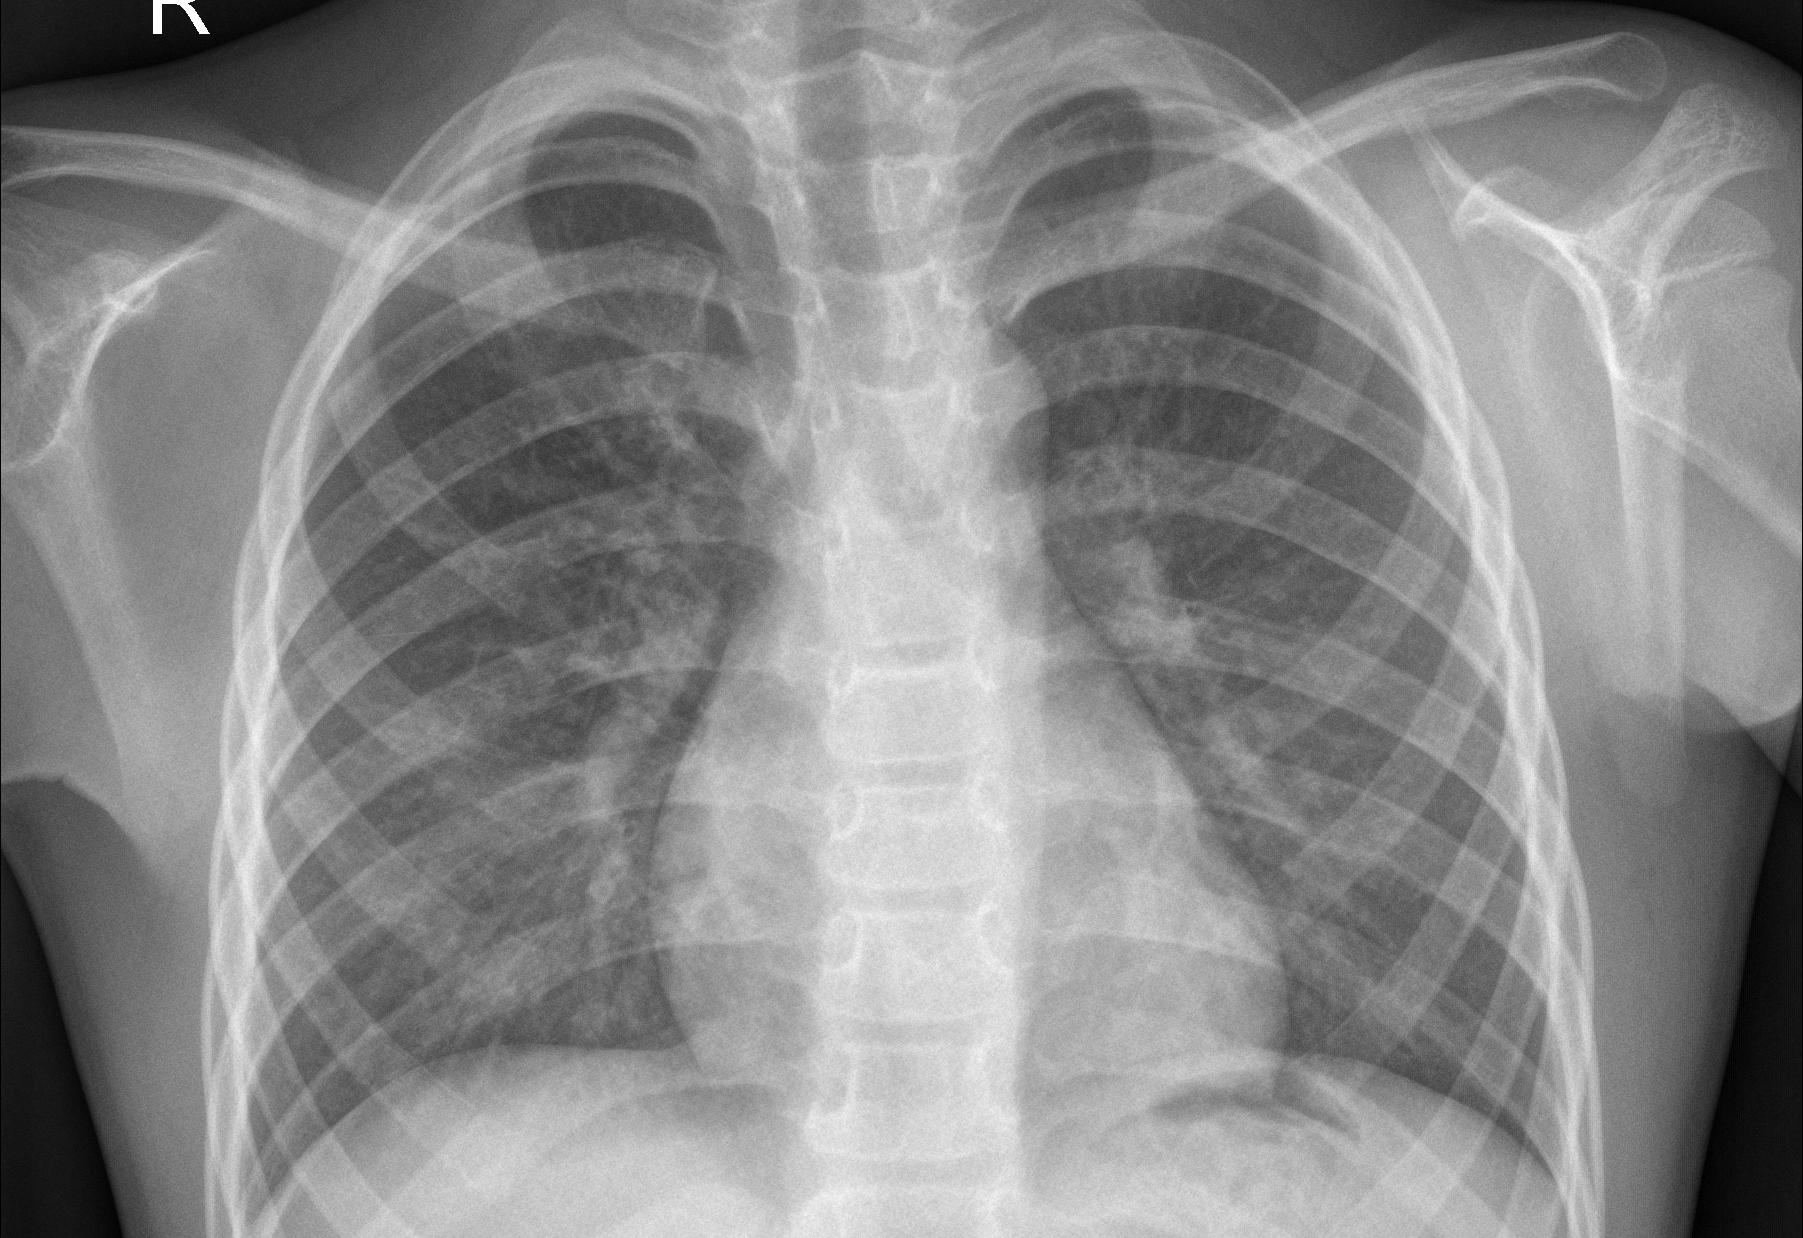

In [11]:
# 3 Create a list of file paths for normal images from the testing dataset
testing_normal_images = list(data_dir.glob('test/normal/*'))
# Open and display the first pneumonia image in the list
PIL.Image.open(str(testing_normal_images[0]))

# Define a deep learning model that will learn the differences between pneumonia and normal CT images


In [12]:
# Define batch size and image dimensions for training

# BEGIN YOUR CODE HERE
# The batch size is the number of samples processed before the model is updated.
# Choose an appropriate batch size. Find out the resolution of the image and
# fill in the values of the following three variables
batch_size = 5
img_height = 350
img_width = 350
# END YOUR CODE HERE

In [13]:
train_data_dir  = os.path.join(data_dir,'train')
test_data_dir = os.path.join(data_dir,'test')

In [14]:
# Create a TensorFlow image dataset from a directory
# BEGIN YOUR CODE HERE
# Use the function tf.keras.utils.image_dataset_from_directory in order to load
# the training dataset: https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory
# 1. First argument is your training directory folder,
# 2. Use 20% of the data for validation, for image size,
# 3. name the subset as "training"
# 4. you can set a seed such that when you repeat experiments you get similar results, eg: seed=123
# 5. for image size use the img_height and img_width variables you defined previously.
# 6. Use for batch size the batch_size variable you defined earlier in the code
# tf.keras.utils.image_dataset_from_directory(
#     directory,
#     validation_split=None,
#     subset='',
#     seed=None,
#     image_size=(height, width),
#     batch_size=-1
# )
# eg: train_ds = tf.keras.utils.image_dataset_from_directory(...)

train_ds= tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset='training',
    seed = 200,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


# END YOUR CODE HERE

Found 200 files belonging to 2 classes.
Using 160 files for training.


In [15]:
# Create a layer to normalise pixel values to the [0, 1] range.
# By default, when you load an image, each pixel value will have a value between 0-255
# but, in neural networks, we need as input normalised values in [0,1] interval.
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image), first_image[0][0])

0.0 0.9958014 tf.Tensor([0.0081341 0.0081341 0.0081341], shape=(3,), dtype=float32)


In [17]:
# BEGIN YOUR CODE HERE
# Define the number of classes in the classification problem.
# How many classes do we have in this dataset?
num_classes = 2

# END YOUR CODE HERE

In [18]:
# BEGIN YOUR CODE HERE
# Define a tensorflow model using the tf.keras.Sequential class: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# The last layer should be a Dense layer with the number of output neurons num_classes
# Use as a starting point the tf.keras.Sequential model defined for the MNIST problem.
# See Lab-DeepLearning-ImageClassification.
# For the first Conv2D layer, you are not required to specify the input shape. If that
# parameter is not given, tensorflow library will infer the size of the input when
# you fit the model, so it will depend on the size of the dataset.
# Important: change the output of the last Dense layer to match the number of classes for this problem.
# If you don't use any of the Dropout layers what accuracy do you get?
# What accuracy do you get with the Dropout layers?

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, kernel_size=(3,3),
                                                            activation = 'relu',),
                                     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                     tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     tf.keras.layers.Dropout(0.2),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                     tf.keras.layers.Dropout(0.5),
                                     tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)])


# END YOUR CODE HERE

In [19]:
# Compile the model with an optimizer, loss function, and evaluation metric
# There are several ways in which the loss or error between the label and
# the predictions can be computed. One of them is called SparseCategoricalCrossentropy
# https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy
# You can also experiment with BinaryCrossentropy since for this problem we also have
# two classes, pneumonia vs normal: https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']) # Monitor accuracy and F1 score during training

In [20]:
# BEGIN YOUR CODE HERE
# Train the model on the provided dataset for a specified number of epochs
# Modify the network architecture such that you maximise the accuracy.
# Tip: aim to get an accuracy of at least 90% on the training set.
# For this, you can use the function fit, as in model.fit(...)
# The first argument is the train_ds variable defined above.
# This variable contains both the x (data - pneumonia and normal images) and y
# (labels - pneumonia vs normal).
# Start training using 5 epochs. What is the accuracy you get?
# How about if you increase the number of epochs?

model.fit(train_ds, epochs=10)

# END YOUR CODE HERE

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


32/32 [==============================] - 12s 54ms/step - loss: 875.8353 - accuracy: 0.6250
Epoch 2/10
32/32 [==============================] - 2s 53ms/step - loss: 0.6195 - accuracy: 0.9000
Epoch 3/10
32/32 [==============================] - 2s 53ms/step - loss: 0.3875 - accuracy: 0.9438
Epoch 4/10
32/32 [==============================] - 2s 52ms/step - loss: 0.2222 - accuracy: 0.9625
Epoch 5/10
32/32 [==============================] - 3s 70ms/step - loss: 0.1439 - accuracy: 0.9750
Epoch 6/10
32/32 [==============================] - 3s 76ms/step - loss: 0.0140 - accuracy: 0.9937
Epoch 7/10
32/32 [==============================] - 2s 54ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 8/10
32/32 [==============================] - 2s 54ms/step - loss: 0.0257 - accuracy: 0.9937
Epoch 9/10
32/32 [==============================] - 2s 53ms/step - loss: 0.0959 - accuracy: 0.9812
Epoch 10/10
32/32 [==============================] - 2s 54ms/step - loss: 0.1875 - accuracy: 0.9750


In [21]:
# Let's load the testing dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 100 files belonging to 2 classes.


In [22]:
# BEGIN YOUR CODE HERE
# What is the loss and accuracy on the Testing dataset?
# Tip: instead of (x_test, y_test) we used in the lab last week, you can use
# directly test_ds which contains both data and labels
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
# eg: model.evaluate(...)
# You only need to specify the testing dataset.

model.evaluate(test_ds)
# END YOUR CODE HERE

20/20 [==============================] - 1s 28ms/step - loss: 2.1292 - accuracy: 0.7800


[2.1292052268981934, 0.7799999713897705]

In [23]:
# Try to improve the model such that it performs well on both training and testing datasets. above 75